# Assignment 3 Data Analysis and Regression

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
amesdataset=pd.read_csv('ames_housing_data.csv')

In [5]:
len(amesdataset)

2930

In [7]:
#waterfall counts

#all data
a = amesdataset
lena = len(a)
#Homes w/residential zoning limits
b = amesdataset[(amesdataset['Zoning'] == 'RH') | (amesdataset['Zoning'] == 'RL') | (amesdataset['Zoning'] == 'RP') | (amesdataset['Zoning'] == 'RM')]
lenb = len(b)
#Homes w/Normal sale conditions
c = b[b['SaleCondition'] == 'Normal']
lenc = len(c)
#Homes single-family residences
d = c[c['BldgType'] == '1Fam']
lend = len(d)
#Homes w/SalePrice < 700,000
e = d[d['SalePrice'] <= 700000]
lene = len(e)

In [8]:
print lena
print lenb
print lenc
print lend
print lene

2930
2762
2305
1943
1942


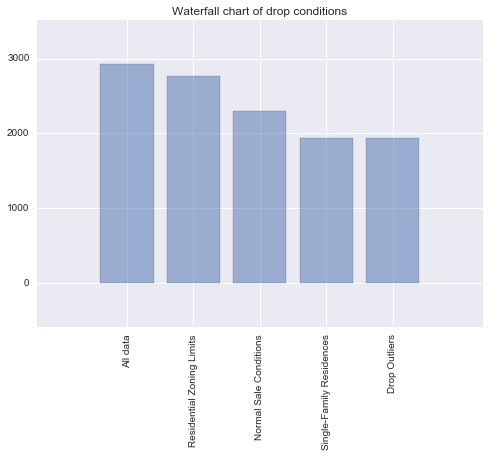

In [9]:
dropconditions = ['All data', 'Residential Zoning Limits', 'Normal Sale Conditions', 'Single-Family Residences','Drop Outliers']
y_pos = np.arange(len(dropconditions))

observations = (2930, 2762, 2305, 1943, 1942)

#waterfall = plt.bar(z,y, x_tick_label = x)
plt.bar(y_pos, observations, align='center', alpha=0.5)
plt.xticks(y_pos, dropconditions, rotation='vertical')
plt.margins(0.2)
plt.title('Waterfall chart of drop conditions')
plt.show()


Above is a waterfall chart that demonstrates our sample size using the drop conditions described above. We started with 2930 observations in the dataset, narrowed to 2762 observations when looking at properties within residential zoning limits, narrowed to 2305 observations when looking at properties with normal sale conditions, narrowed to 1943 observations when looking at single-family residences, and narrowed to 1942 homes after dropping outliers. 

## Exploratory Data Analysis

Variable | Description | Type of Variable
---| ---| ---
1st Flr SF| First Floor square feet | continuous
2nd Flr SF | Second Floor square feet | continuous 
GR Liv Area | Above grade (ground) living area square feet | continuous
Bedroom | Bedrooms above grade (not including basement) | discrete
Wood Deck SF | Wood deck area in square feet | continuous 
Full Bath | Full bathrooms above grade | discrete 
Garage Area | Size of garage in square feet | continuous
Low Qual Fin SF | Low quality finished square feet (all floors) | continuous
Total Bsmt SF | Total square feet of basement area | continuous
Year Built | Original construction date | continuous
SalePrice | Sale price $ of property | continuous

### Continuous Variables

In [10]:
dfcontin = e[['FirstFlrSF', 'SecondFlrSF', 'GrLivArea', 'WoodDeckSF', 'GarageArea', 'LowQualFinSF', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']]

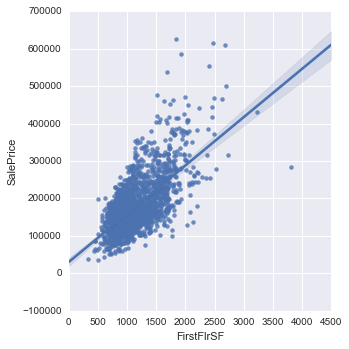

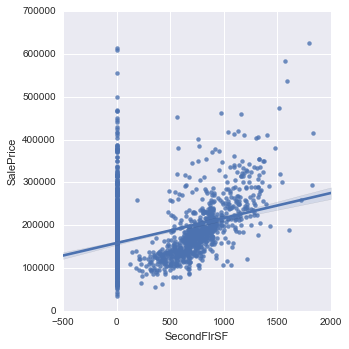

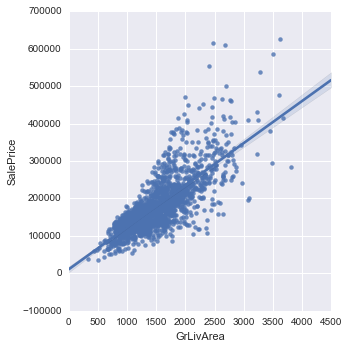

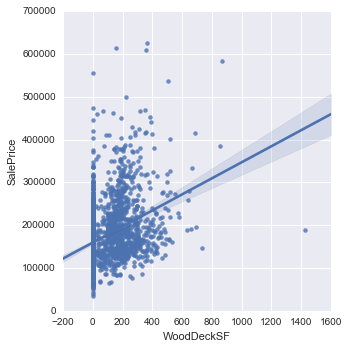

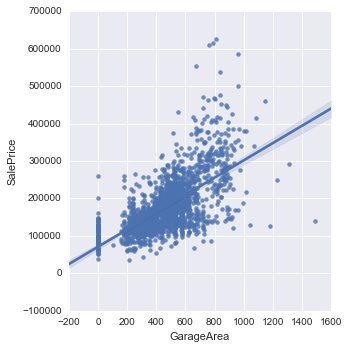

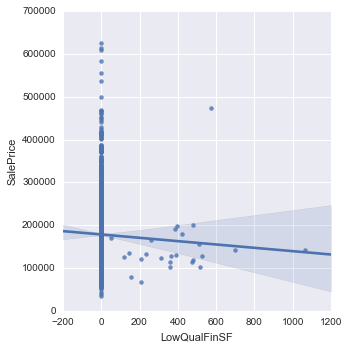

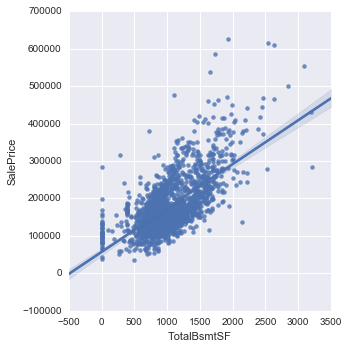

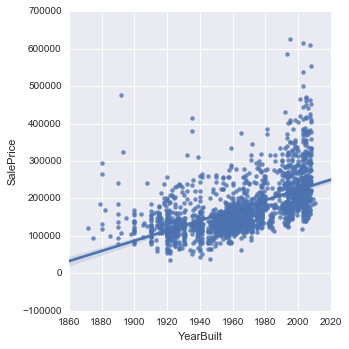

In [11]:
sns.lmplot('FirstFlrSF', 'SalePrice', dfcontin)
sns.lmplot('SecondFlrSF', 'SalePrice', dfcontin)
sns.lmplot('GrLivArea', 'SalePrice', dfcontin)
sns.lmplot('WoodDeckSF', 'SalePrice', dfcontin)
sns.lmplot('GarageArea', 'SalePrice', dfcontin)
sns.lmplot('LowQualFinSF', 'SalePrice', dfcontin)
sns.lmplot('TotalBsmtSF', 'SalePrice', dfcontin)
sns.lmplot('YearBuilt', 'SalePrice', dfcontin)

### Discrete Variables

In [12]:
dfdiscr = e[['FullBath', 'BedroomAbvGr', 'SalePrice']]

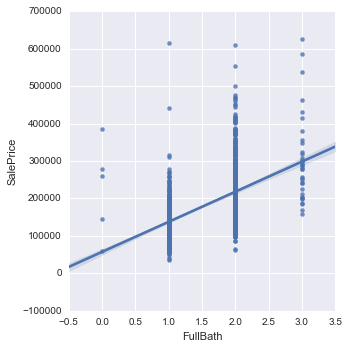

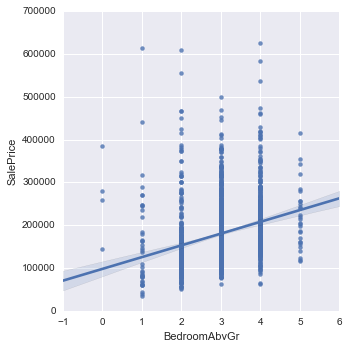

In [13]:
sns.lmplot('FullBath', 'SalePrice', dfdiscr)
sns.lmplot('BedroomAbvGr', 'SalePrice', dfdiscr)

## Simple Linear Regression - GrLivArea


In [14]:
X = dfcontin[['GrLivArea']]
y = dfcontin['SalePrice']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=dfcontin).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     2834.
Date:                Sat, 08 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:04:46   Log-Likelihood:                -23600.
No. Observations:                1942   AIC:                         4.720e+04
Df Residuals:                    1940   BIC:                         4.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.097e+04   3309.019      3.316      0.001      4483.749  1.75e+04
X            112.2382      2.108     53.232      0.000       108.103   116.373
==============================================================================
Omnibus:                      498.190   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2817.066
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       8.488   Cond. No.                     4.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

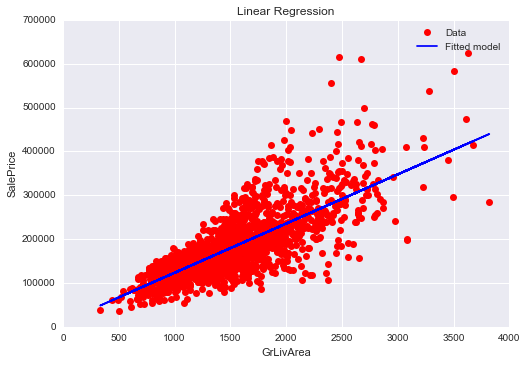

In [15]:
#Plot data and model
plt.plot(dfcontin['GrLivArea'], dfcontin['SalePrice'], 'ro')
plt.plot(dfcontin['GrLivArea'], lm.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

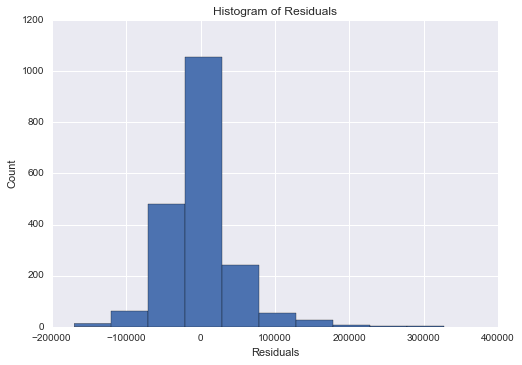

In [16]:
#Histogram of residuals
plt.hist(lm.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

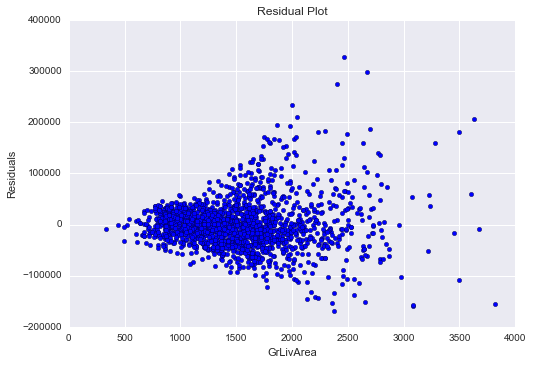

In [17]:
# X vs residuals. Residual Plot
plt.scatter(dfcontin['GrLivArea'], lm.resid)
plt.xlabel('GrLivArea')
plt.ylabel('Residuals')
plt.title('Residual Plot')

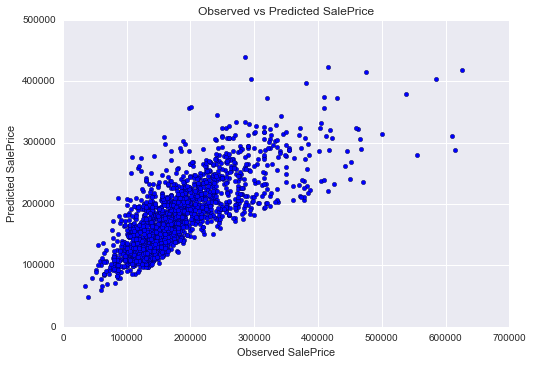

In [18]:
# Observed vs Fitted
plt.scatter(dfcontin['SalePrice'], lm.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

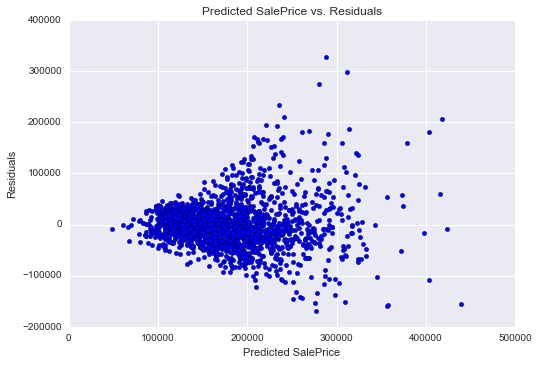

In [19]:
# Fitted  vs Residuals
plt.scatter(lm.fittedvalues, lm.resid)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Predicted SalePrice vs. Residuals')

## Simple Linear Regression - Year Built

In [20]:
X = dfcontin[['YearBuilt']]
y = dfcontin['SalePrice']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm2 = smf.ols(formula='y ~ X', data=dfcontin).fit()
#print the full summary
lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     866.8
Date:                Sat, 08 Jul 2017   Prob (F-statistic):          8.11e-158
Time:                        14:04:49   Log-Likelihood:                -24116.
No. Observations:                1942   AIC:                         4.824e+04
Df Residuals:                    1940   BIC:                         4.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.497e+06   9.09e+04    -27.478      0.000     -2.68e+06 -2.32e+06
X           1359.9978     46.192     29.442      0.000      1269.406  1450.589
==============================================================================
Omnibus:                      857.981   Durbin-Watson:                   1.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5043.867
Skew:                           2.010   Prob(JB):                         0.00
Kurtosis:                       9.795   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

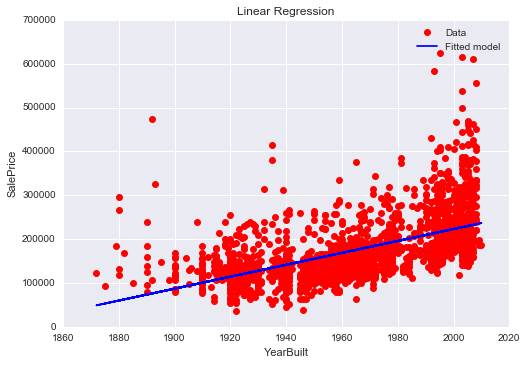

In [21]:
#Plot data and model
plt.plot(dfcontin['YearBuilt'], dfcontin['SalePrice'], 'ro')
plt.plot(dfcontin['YearBuilt'], lm2.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

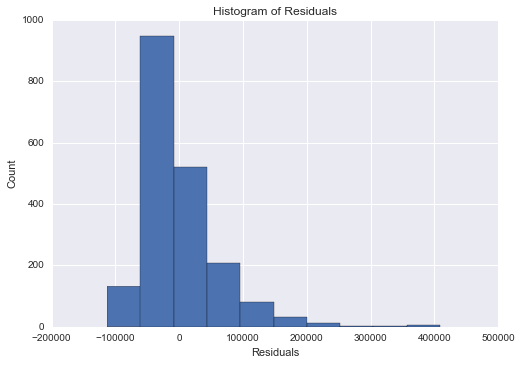

In [22]:
#Histogram of residuals
plt.hist(lm2.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

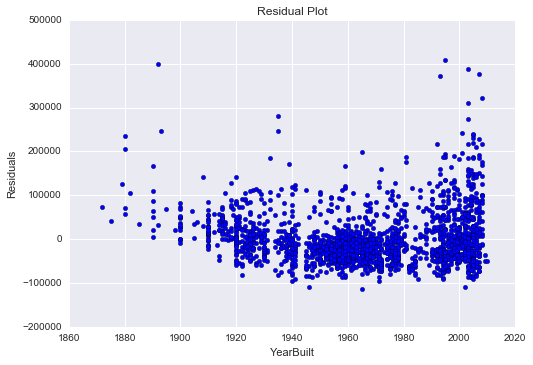

In [23]:
# X vs residuals. Residual Plot
plt.scatter(dfcontin['YearBuilt'], lm2.resid)
plt.ylabel('Residuals')
plt.xlabel('YearBuilt')
plt.title('Residual Plot')

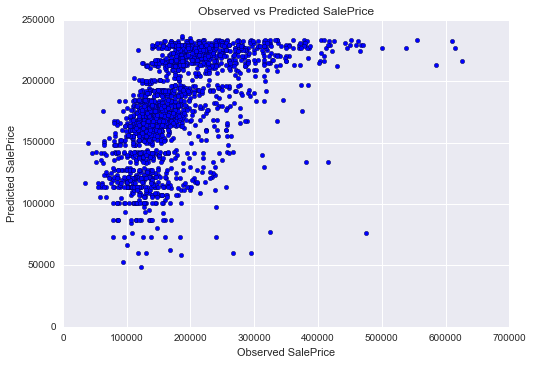

In [24]:
# Observed vs Fitted
plt.scatter(dfcontin['SalePrice'], lm2.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

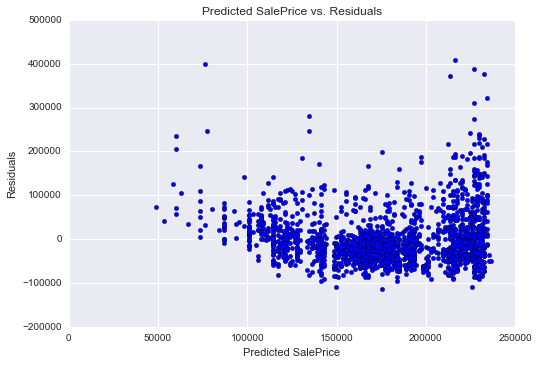

In [25]:
# Fitted vs Residuals
plt.scatter(lm2.fittedvalues, lm2.resid)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Predicted SalePrice vs. Residuals')

## Multiple Linear Regression

In [26]:
X = dfcontin[['GrLivArea', 'YearBuilt']]
y = dfcontin['SalePrice']

## fit a OLS model with intercept
X = sm.add_constant(X)
lm3 = smf.OLS(y, X).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     2523.
Date:                Sat, 08 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:04:51   Log-Likelihood:                -23230.
No. Observations:                1942   AIC:                         4.647e+04
Df Residuals:                    1939   BIC:                         4.648e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.763e+06   5.92e+04    -29.780      0.000     -1.88e+06 -1.65e+06
GrLivArea     97.3908      1.812     53.750      0.000        93.837   100.944
YearBuilt    913.0768     30.438     29.998      0.000       853.382   972.772
==============================================================================
Omnibus:                      787.437   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5948.834
Skew:                           1.719   Prob(JB):                         0.00
Kurtosis:                      10.855   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [383]:
sk.mean_absolute_error(dfcontin["SalePrice"], lm3.fittedvalues, sample_weight=None, multioutput='uniform_average')

26305.934234664281

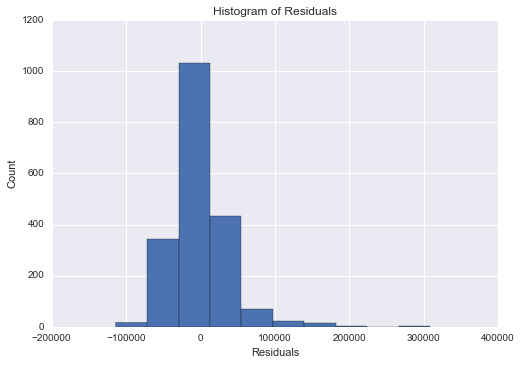

In [27]:
#Histogram of residuals
plt.hist(lm3.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

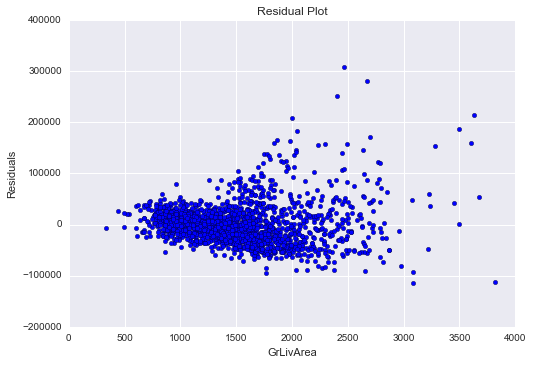

In [28]:
# GrLivArea vs residuals. Residual Plot
plt.scatter(dfcontin['GrLivArea'], lm3.resid)
plt.ylabel('Residuals')
plt.xlabel('GrLivArea')
plt.title('Residual Plot')

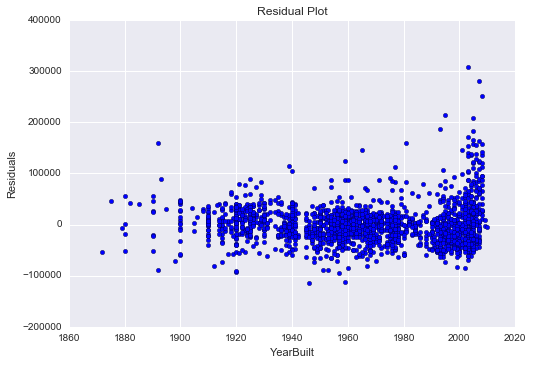

In [29]:
# YearBuilt vs residuals. Residual Plot
plt.scatter(dfcontin['YearBuilt'], lm3.resid)
plt.ylabel('Residuals')
plt.xlabel('YearBuilt')
plt.title('Residual Plot')

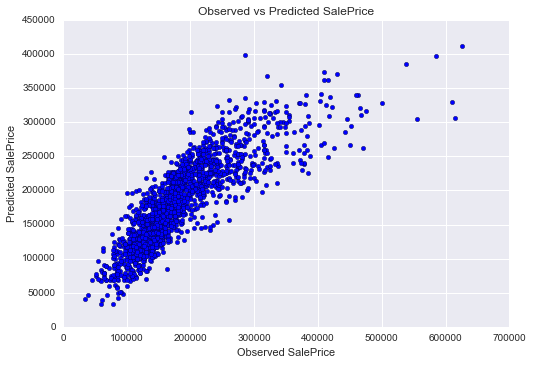

In [30]:
# Observed vs Fitted
plt.scatter(dfcontin['SalePrice'], lm3.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

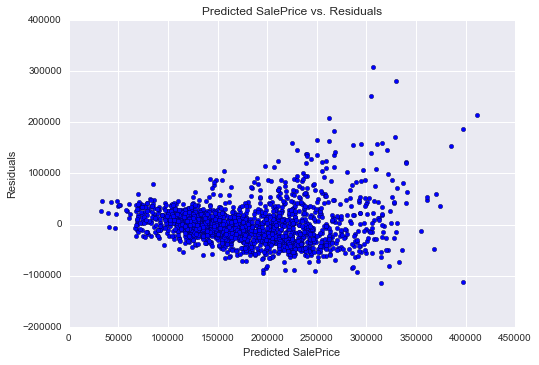

In [31]:
# Fitted vs Residuals
plt.scatter(lm3.fittedvalues, lm3.resid)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Predicted SalePrice vs. Residuals')

## Neighborhood Accuracy

### Concatenate Neighborhoods and Square Footage with GrLivArea, YearBuilt, and SalePrice 

In [153]:
dfneigh = pd.concat([dfcontin[['GrLivArea', 'YearBuilt', 'SalePrice']], e[['Neighborhood', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF']], lm3.resid, lm3.fittedvalues], axis=1)
dfneigh=dfneigh.rename(columns = {0:'Residual', 1:'Fitted Value'})
dfneigh.head()

,GrLivArea,YearBuilt,SalePrice,Neighborhood,TotalBsmtSF,FirstFlrSF,SecondFlrSF,Residual,Fitted Value
0,1656,1960,215000,NAmes,1080.0,1656,0,27030.321131,187969.678869
1,896,1961,105000,NAmes,882.0,896,0,-9865.733786,114865.733786
2,1329,1958,172000,NAmes,1329.0,1329,0,17703.272210,154296.727790
3,2110,1968,244000,NAmes,2110.0,2110,0,4510.275570,239489.724430
4,1629,1997,189900,Gilbert,928.0,928,701,-29223.966947,219123.966947


### Boxplot of Residuals by Neighborhood

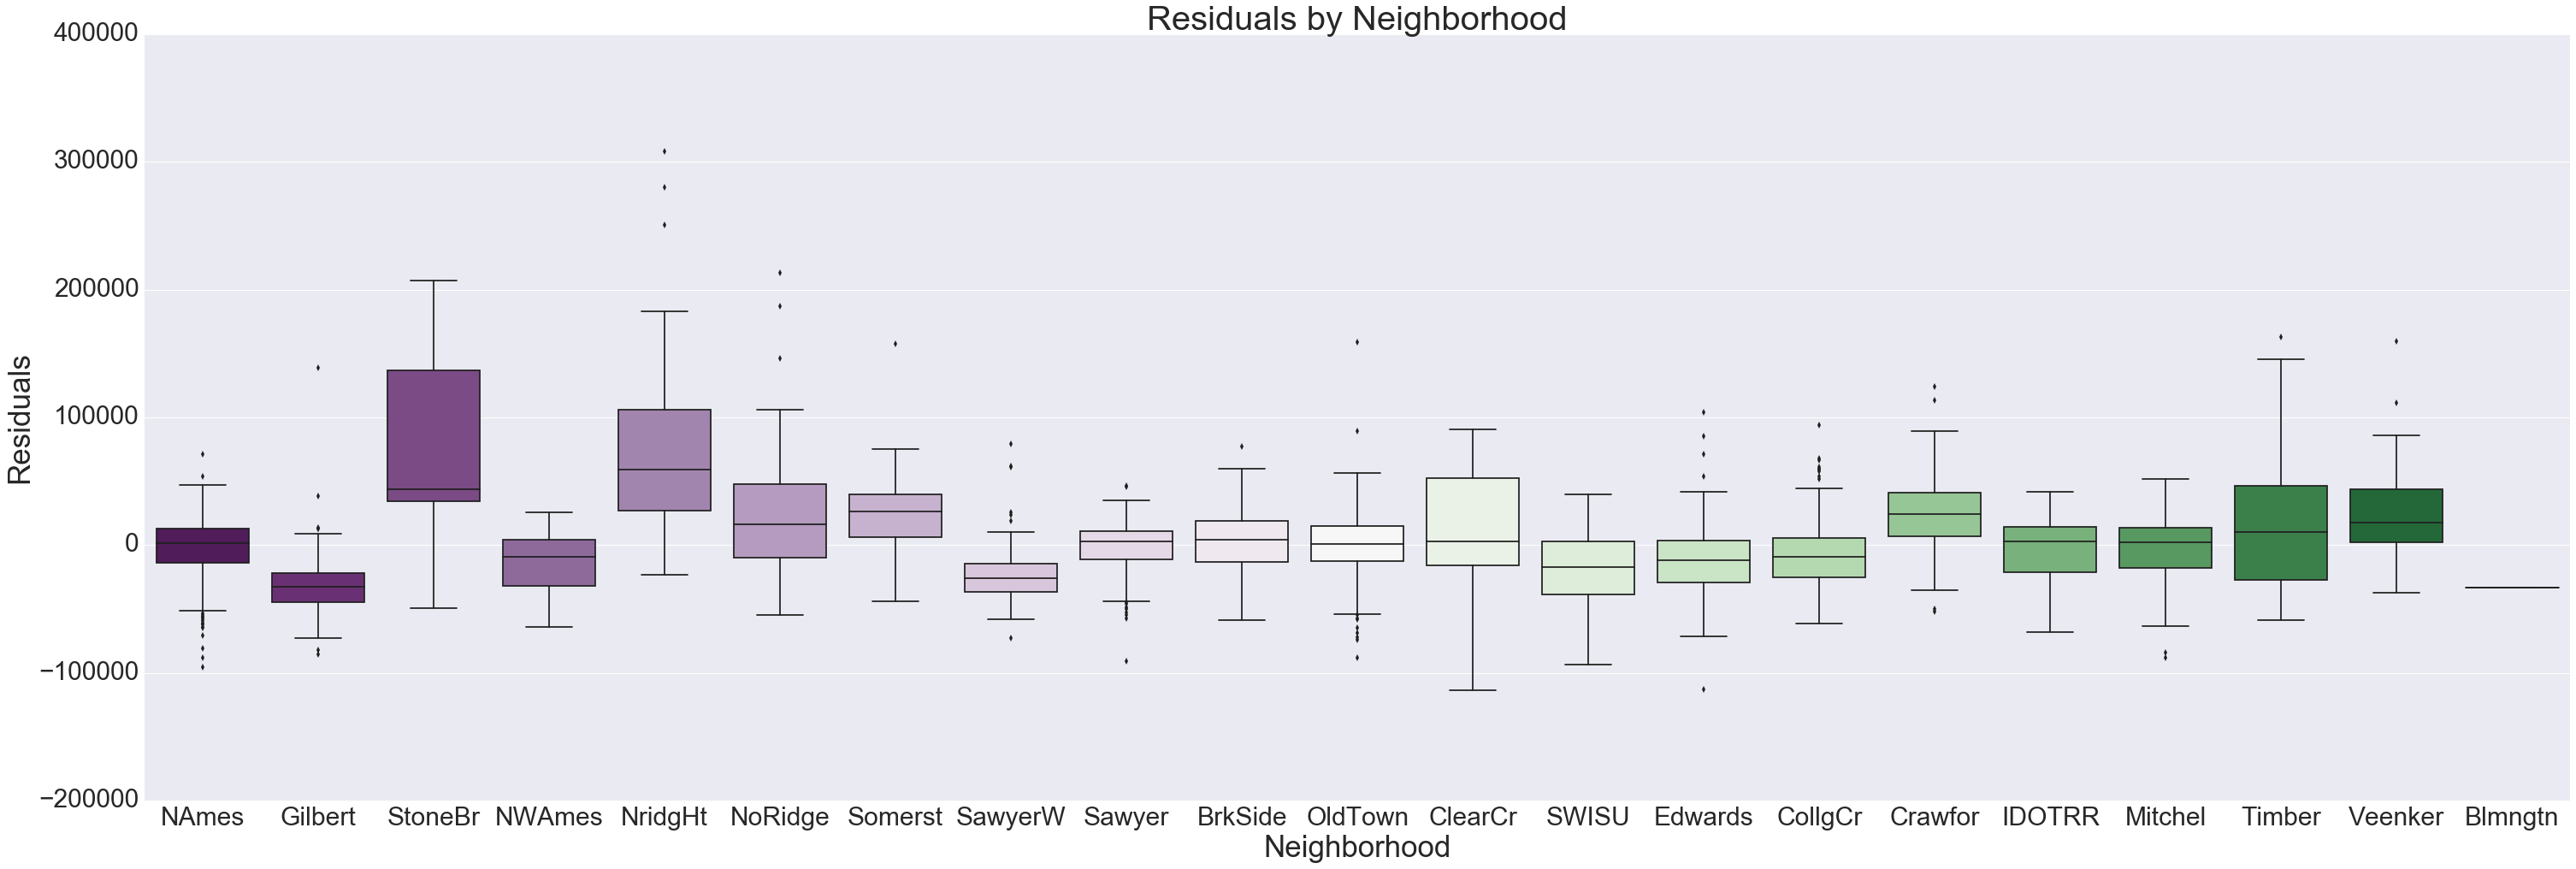

In [145]:
plt.rcParams["axes.labelsize"] = 35
plt.rc('ytick', labelsize=30) 
plt.rc('xtick', labelsize=30) 
g = sns.FacetGrid(dfneigh, size=14, aspect=3)
(g.map(sns.boxplot, "Neighborhood", 0, palette="PRGn"))
g.ax.set( ylabel='Residuals')
plt.title('Residuals by Neighborhood', size=40)

### Compute the mean MAE and the mean price per square foot for each neighborhood.

In [154]:
#Calculate Price per Square Foot
dfneigh['PricePerSF'] = dfneigh['SalePrice'] / (dfneigh['TotalBsmtSF'] + dfneigh['FirstFlrSF'] + dfneigh['SecondFlrSF'])

In [274]:
dfneigh.head(2)

,GrLivArea,YearBuilt,SalePrice,Neighborhood,TotalBsmtSF,FirstFlrSF,SecondFlrSF,Residual,Fitted Value,PricePerSF
0,1656,1960,215000,NAmes,1080.0,1656,0,27030.321131,187969.678869,78.581871
1,896,1961,105000,NAmes,882.0,896,0,-9865.733786,114865.733786,59.055118


In [187]:
#subset by neighborhood
Blmngtn = dfneigh[dfneigh['Neighborhood'] == 'Blmngtn']
Blueste = dfneigh[dfneigh['Neighborhood'] == 'Blueste']
BrDale = dfneigh[dfneigh['Neighborhood'] == 'BrDale']
BrkSide = dfneigh[dfneigh['Neighborhood'] == 'BrkSide']
ClearCr = dfneigh[dfneigh['Neighborhood'] == 'ClearCr']
CollgCr = dfneigh[dfneigh['Neighborhood'] == 'CollgCr']
Crawfor = dfneigh[dfneigh['Neighborhood'] == 'Crawfor']
Edwards = dfneigh[dfneigh['Neighborhood'] == 'Edwards']
Gilbert = dfneigh[dfneigh['Neighborhood'] == 'Gilbert']
Greens = dfneigh[dfneigh['Neighborhood'] == 'Greens']
GrnHill = dfneigh[dfneigh['Neighborhood'] == 'GrnHill']
IDOTRR = dfneigh[dfneigh['Neighborhood'] == 'IDOTRR']
Landmrk = dfneigh[dfneigh['Neighborhood'] == 'Landmrk']
MeadowV = dfneigh[dfneigh['Neighborhood'] == 'MeadowV']
Mitchel = dfneigh[dfneigh['Neighborhood'] == 'Mitchel']
NAmes = dfneigh[dfneigh['Neighborhood'] == 'NAmes']
NoRidge = dfneigh[dfneigh['Neighborhood'] == 'NoRidge']
NPkVill = dfneigh[dfneigh['Neighborhood'] == 'NPkVill']
NridgHt = dfneigh[dfneigh['Neighborhood'] == 'NridgHt']
NWAmes = dfneigh[dfneigh['Neighborhood'] == 'NWAmes']
OldTown = dfneigh[dfneigh['Neighborhood'] == 'OldTown']
SWISU = dfneigh[dfneigh['Neighborhood'] == 'SWISU']
Sawyer = dfneigh[dfneigh['Neighborhood'] == 'Sawyer']
SawyerW = dfneigh[dfneigh['Neighborhood'] == 'SawyerW']
Somerst = dfneigh[dfneigh['Neighborhood'] == 'Somerst']
StoneBr = dfneigh[dfneigh['Neighborhood'] == 'StoneBr']
Timber = dfneigh[dfneigh['Neighborhood'] == 'Timber']
Veenker = dfneigh[dfneigh['Neighborhood'] == 'Veenker']

In [229]:
dfneigh.groupby('Neighborhood').count()

,GrLivArea,YearBuilt,SalePrice,TotalBsmtSF,FirstFlrSF,SecondFlrSF,Residual,Fitted Value,PricePerSF
Neighborhood,,,,,,,,,
Blmngtn,1,1,1,1,1,1,1,1,1
BrkSide,96,96,96,96,96,96,96,96,96
ClearCr,37,37,37,37,37,37,37,37,37
CollgCr,213,213,213,213,213,213,213,213,213
Crawfor,78,78,78,78,78,78,78,78,78
Edwards,129,129,129,129,129,129,129,129,129
Gilbert,128,128,128,128,128,128,128,128,128
IDOTRR,50,50,50,50,50,50,50,50,50
Mitchel,83,83,83,83,83,83,83,83,83


In [234]:
#check
print len(dfneigh)
#removed neighborhoods that are not present in dataset
print len(Blmngtn) + len(BrkSide) + len(ClearCr) + len(CollgCr) + len(Crawfor) + len(Edwards) + len(Gilbert) + len(IDOTRR) + len(Mitchel) + len(NAmes) + len(NWAmes) + len(NoRidge) + len(NridgHt) + len(OldTown) + len(SWISU) + len(Sawyer) + len(SawyerW) + len(Somerst) + len(StoneBr)+ len(Timber) + len(Veenker)

1942
1942


In [257]:
#list of neighborhoods in data subset
x = ["Blmngtn", "BrkSide", "ClearCr", "CollgCr", "Crawfor", "Edwards", "Gilbert", "IDOTRR", "Mitchel", "NAmes", "NWAmes", "NoRidge", "NridgHt", "OldTown", "SWISU", "Sawyer", "SawyerW", "Somerst", "StoneBr", "Timber", "Veenker"]

In [258]:
#find MAE of each neighborhood
import sklearn.metrics as sk
y = [sk.mean_absolute_error(Blmngtn['SalePrice'], Blmngtn['Fitted Value']), sk.mean_absolute_error(BrkSide['SalePrice'], BrkSide['Fitted Value']), sk.mean_absolute_error(ClearCr['SalePrice'], ClearCr['Fitted Value']), sk.mean_absolute_error(CollgCr['SalePrice'], CollgCr['Fitted Value']), sk.mean_absolute_error(Crawfor['SalePrice'], Crawfor['Fitted Value']), sk.mean_absolute_error(Edwards['SalePrice'], Edwards['Fitted Value']), sk.mean_absolute_error(Gilbert['SalePrice'], Gilbert['Fitted Value']), sk.mean_absolute_error(IDOTRR['SalePrice'], IDOTRR['Fitted Value']), sk.mean_absolute_error(Mitchel['SalePrice'], Mitchel['Fitted Value']), sk.mean_absolute_error(NAmes['SalePrice'], NAmes['Fitted Value']), sk.mean_absolute_error(NWAmes['SalePrice'], NWAmes['Fitted Value']), sk.mean_absolute_error(NoRidge['SalePrice'], NoRidge['Fitted Value']), sk.mean_absolute_error(NridgHt['SalePrice'], NridgHt['Fitted Value']), sk.mean_absolute_error(OldTown['SalePrice'], OldTown['Fitted Value']), sk.mean_absolute_error(SWISU['SalePrice'], SWISU['Fitted Value']), sk.mean_absolute_error(Sawyer['SalePrice'], Sawyer['Fitted Value']), sk.mean_absolute_error(SawyerW['SalePrice'], SawyerW['Fitted Value']), sk.mean_absolute_error(Somerst['SalePrice'], Somerst['Fitted Value']), sk.mean_absolute_error(StoneBr['SalePrice'], StoneBr['Fitted Value']), sk.mean_absolute_error(Timber['SalePrice'], Timber['Fitted Value']), sk.mean_absolute_error(Veenker['SalePrice'], Veenker['Fitted Value'])]

In [267]:
#find mean price per square foot for each neighborhood
z = [Blmngtn["PricePerSF"].mean(), BrkSide["PricePerSF"].mean(), ClearCr["PricePerSF"].mean(), CollgCr["PricePerSF"].mean(), Crawfor["PricePerSF"].mean(), Edwards["PricePerSF"].mean(), Gilbert["PricePerSF"].mean(), IDOTRR["PricePerSF"].mean(), Mitchel["PricePerSF"].mean(), NAmes["PricePerSF"].mean(), NWAmes["PricePerSF"].mean(), NoRidge["PricePerSF"].mean(), NridgHt["PricePerSF"].mean(), OldTown["PricePerSF"].mean(), SWISU["PricePerSF"].mean(), Sawyer["PricePerSF"].mean(), SawyerW["PricePerSF"].mean(), Somerst["PricePerSF"].mean(), StoneBr["PricePerSF"].mean(), Timber["PricePerSF"].mean(), Veenker["PricePerSF"].mean()] 

In [269]:
#check
print len(x)
print len(y)
print len(z)

21
21
21


In [285]:
#view MAE and MeanPricePerSF by neighborhood
dfneighvalues = pd.DataFrame(list(zip(x,y,z)), columns = ['Neighborhood', 'MAE', 'MeanPricePerSF'])
print dfneighvalues.describe()
print dfneighvalues.sort(columns="MeanPricePerSF")

                MAE  MeanPricePerSF
count     21.000000       21.000000
mean   33475.852244       72.457067
std    17590.819252        9.231037
min    16651.608396       58.977796
25%    20777.114097       64.721719
50%    29220.964116       73.163610
75%    38858.740494       77.607407
max    82521.743611       91.403710
   Neighborhood           MAE  MeanPricePerSF
14        SWISU  29220.964116       58.977796
13      OldTown  21533.615065       60.387074
7        IDOTRR  22570.067089       60.839285
0       Blmngtn  33006.867548       63.149684
5       Edwards  25800.459819       63.973081
1       BrkSide  20223.162125       64.721719
9         NAmes  16942.499952       65.895580
10       NWAmes  20545.991613       68.128229
15       Sawyer  16651.608396       68.546296
16      SawyerW  28790.468477       71.773233
8       Mitchel  19099.224169       73.163610
2       ClearCr  40872.610178       73.998110
3       CollgCr  20777.114097       75.200811
4       Crawfor  32347.345812   

/Users/ameeamin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


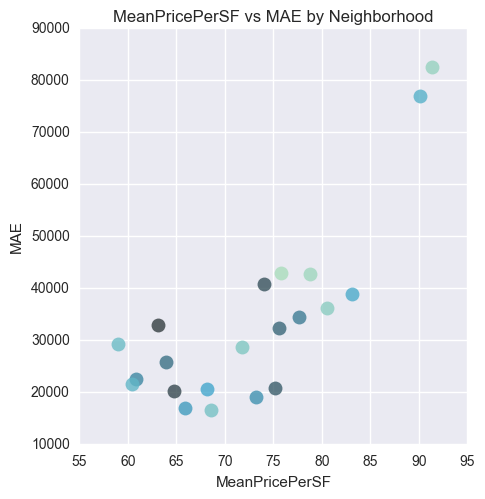

In [404]:
#scatterplot of MAW and MeanPricePerSF by neighborhood
sns.set()
sns.lmplot('MeanPricePerSF', 'MAE',
           data=dfneighvalues,
           fit_reg=False,
           hue="Neighborhood",
           legend=False,
           palette=("GnBu_d"),
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('MeanPricePerSF vs MAE by Neighborhood')
plt.xlabel('MeanPricePerSF')
plt.ylabel('MAE')

## Grouping Neighborhoods
under 64:
SWISU
Old Town
IDOTRR
Blmngtn
Edwards

greater than 64, less than 70:
BrkSide
NAmes
NWAems
Sawyer

greater than 70, less than 74:
SawyerW
Mitchel
ClearCr

greater than 74, less than 85:
CollgCr
Crawor
Veenker
Gilbert
Timber
Somerst
NoRidge

greater than 85, less than 95
NridgHt
StoneBr


In [361]:
#group neighborhoods into 5 groups
def grouping(x):
  if x["Neighborhood"] == "SWISU" or x["Neighborhood"] == "OldTown" or x["Neighborhood"] == "IDOTRR" or x["Neighborhood"] == "Blmngtn" or x["Neighborhood"] == "Edwards":
    return 0
  elif x["Neighborhood"] == "BrkSide" or x["Neighborhood"] == "NAmes" or x["Neighborhood"] == "NWAmes" or x["Neighborhood"] == "Sawyer":
    return 1
  elif  x["Neighborhood"] == "SawyerW" or x["Neighborhood"] == "Mitchel" or x["Neighborhood"] == "ClearCr":
    return 2
  elif  x["Neighborhood"] == "CollgCr" or x["Neighborhood"] == "Crawfor" or x["Neighborhood"] == "Veenker" or x["Neighborhood"] == "Gilbert" or x["Neighborhood"] == "Timber" or x["Neighborhood"] == "Somerst" or x["Neighborhood"] == "NoRidge":
    return 3
  elif  x["Neighborhood"] == "NridgHt" or x["Neighborhood"] == "StoneBr":
    return 4
  else:
    return 5

dfneigh["Group"] = dfneigh.apply(grouping, axis=1)

In [368]:
#check
dfneigh[dfneigh["Group"] == 5]

,GrLivArea,YearBuilt,SalePrice,Neighborhood,TotalBsmtSF,FirstFlrSF,SecondFlrSF,Residual,Fitted Value,PricePerSF,Group


In [371]:
# create dummy variables for Group
dummy_group = pd.get_dummies(dfneigh["Group"], prefix="Group")
#check
print dummy_group.head()

   Group_0  Group_1  Group_2  Group_3  Group_4
0      0.0      1.0      0.0      0.0      0.0
1      0.0      1.0      0.0      0.0      0.0
2      0.0      1.0      0.0      0.0      0.0
3      0.0      1.0      0.0      0.0      0.0
4      0.0      0.0      0.0      1.0      0.0


In [373]:
#combine dummy variables w/dataframe
dfneighreg = pd.concat([dfneigh, dummy_group], axis=1)

#check
dfneighreg.head(2)

,GrLivArea,YearBuilt,SalePrice,Neighborhood,TotalBsmtSF,FirstFlrSF,SecondFlrSF,Residual,Fitted Value,PricePerSF,Group,Group_0,Group_1,Group_2,Group_3,Group_4
0,1656,1960,215000,NAmes,1080.0,1656,0,27030.321131,187969.678869,78.581871,1,0.0,1.0,0.0,0.0,0.0
1,896,1961,105000,NAmes,882.0,896,0,-9865.733786,114865.733786,59.055118,1,0.0,1.0,0.0,0.0,0.0


In [378]:
#see number in each group
dfneighreg.groupby("Group").count()
#choose group 1 as reference group / base category

,GrLivArea,YearBuilt,SalePrice,Neighborhood,TotalBsmtSF,FirstFlrSF,SecondFlrSF,Residual,Fitted Value,PricePerSF,Group_0,Group_1,Group_2,Group_3,Group_4
Group,,,,,,,,,,,,,,,
0,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
1,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690
2,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
3,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573
4,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80


## Refit your multiple regression model with your indicator variables.

In [379]:
X = dfneighreg[['GrLivArea', 'YearBuilt', 'Group_0', 'Group_2', 'Group_3', 'Group_4']]
y = dfneighreg['SalePrice']

## fit a OLS model with intercept
X = sm.add_constant(X)
lm4 = smf.OLS(y, X).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:15:23   Log-Likelihood:                -22977.
No. Observations:                1942   AIC:                         4.597e+04
Df Residuals:                    1935   BIC:                         4.601e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.021e+06    7.4e+04    -13.801      0.000     -1.17e+06 -8.76e+05
GrLivArea     86.9523      1.687     51.531      0.000        83.643    90.262
YearBuilt    539.7119     37.785     14.284      0.000       465.609   613.815
Group_0    -1.173e+04   2310.249     -5.076      0.000     -1.63e+04 -7195.526
Group_2     6228.8430   2796.826      2.227      0.026       743.733  1.17e+04
Group_3      1.85e+04   2284.360      8.097      0.000       1.4e+04   2.3e+04
Group_4     1.032e+05   4478.656     23.054      0.000      9.45e+04  1.12e+05
==============================================================================
Omnibus:                      669.442   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4557.506
Skew:                           1.448   Prob(JB):                         0.00
Kurtosis:                       9.923   Cond. No.                     2.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [382]:
sk.mean_absolute_error(dfneighreg["SalePrice"], lm7.fittedvalues, sample_weight=None, multioutput='uniform_average')
#this value is less than MAE of previous multiple regression: 26305

23279.119380460404

##  Model Comparison of Y versus log(Y)

## Log Transformation of Data

In [384]:
#do a log transformation on SalePrice
log_columns = ['SalePrice']
log_df = dfcontin.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

In [386]:
X = log_df[['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF']]
y = log_df['SalePrice']

## fit a OLS model with intercept
lm5 = smf.OLS(y, X).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.904e+06
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:41:02   Log-Likelihood:                 2480.7
No. Observations:                1942   AIC:                            -4953.
Df Residuals:                    1938   BIC:                            -4931.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
GrLivArea       0.0002   3.63e-06     47.526      0.000         0.000     0.000
YearBuilt       0.0025   2.83e-06    869.886      0.000         0.002     0.002
GarageArea   7.604e-05   9.33e-06      8.154      0.000      5.77e-05  9.43e-05
TotalBsmtSF  7.989e-05   4.44e-06     18.013      0.000      7.12e-05  8.86e-05
==============================================================================
Omnibus:                       95.461   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.015
Skew:                           0.221   Prob(JB):                     7.71e-58
Kurtosis:                       4.748   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

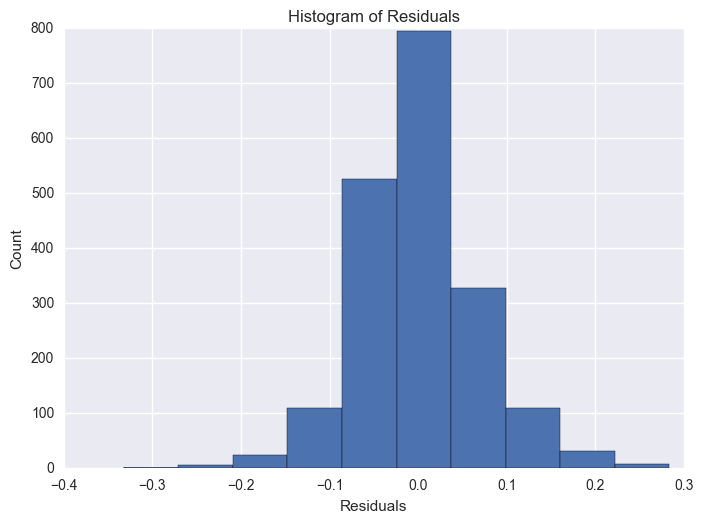

In [388]:
#Histogram of residuals
plt.hist(lm5.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

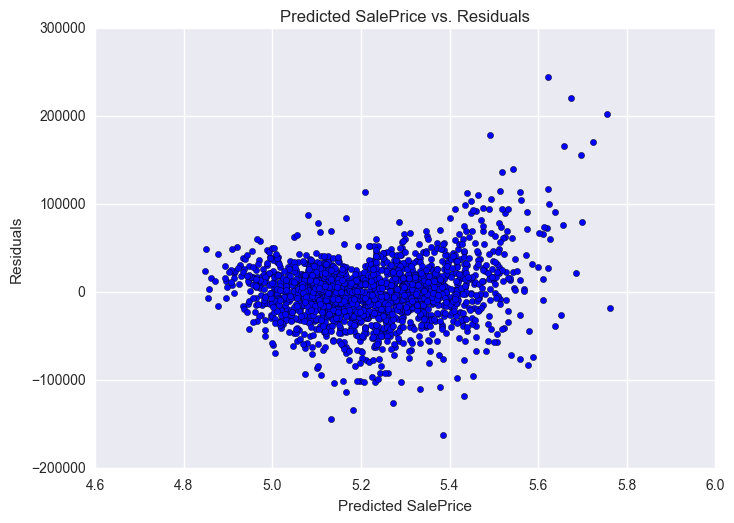

In [391]:
#### Fitted vs Residuals
plt.scatter(lm5.fittedvalues, lm6.resid)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Predicted SalePrice vs. Residuals')

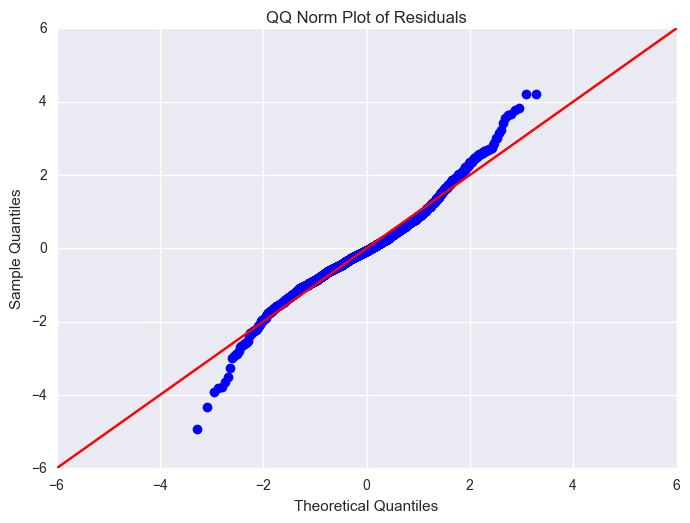

In [405]:
fig = sm.qqplot(lm5.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')

In [387]:
X = dfcontin[['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF']]
y = dfcontin['SalePrice']

## fit a OLS model with intercept
lm6 = smf.OLS(y, X).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.457e+04
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:42:17   Log-Likelihood:                -23045.
No. Observations:                1942   AIC:                         4.610e+04
Df Residuals:                    1938   BIC:                         4.612e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
GrLivArea      75.6943      1.857     40.762      0.000        72.052    79.336
YearBuilt     -18.2626      1.447    -12.621      0.000       -21.100   -15.425
GarageArea     83.6872      4.765     17.561      0.000        74.341    93.033
TotalBsmtSF    60.6986      2.266     26.782      0.000        56.254    65.143
==============================================================================
Omnibus:                      306.805   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2075.229
Skew:                           0.556   Prob(JB):                         0.00
Kurtosis:                       7.941   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

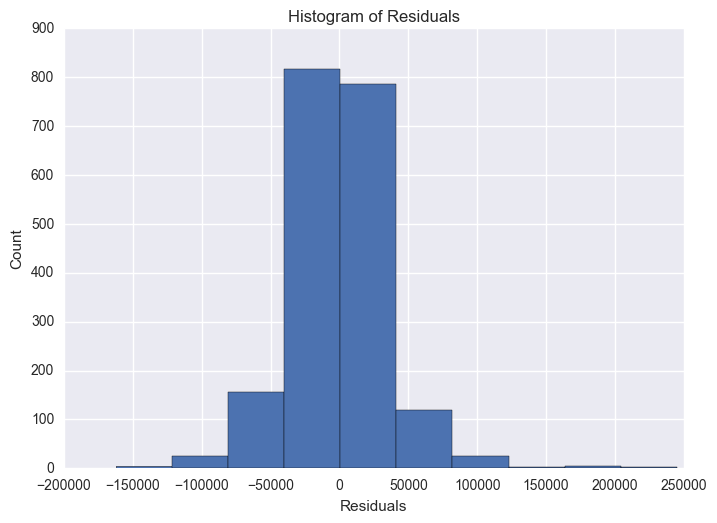

In [389]:
#Histogram of residuals
plt.hist(lm6.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

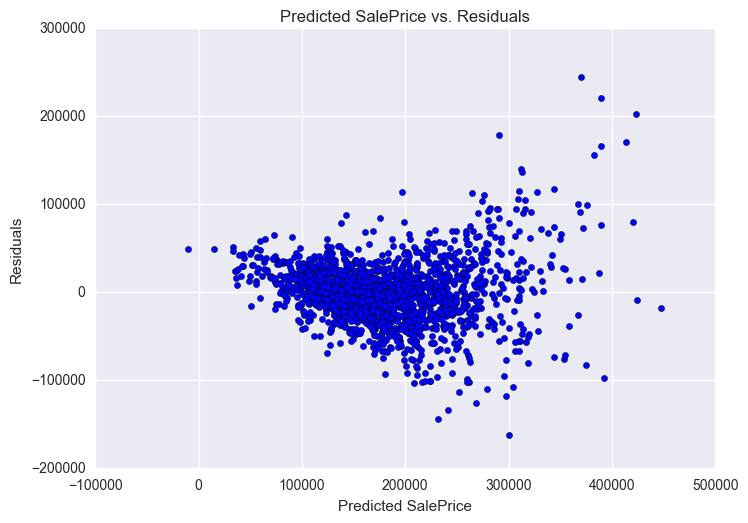

In [390]:
#### Fitted vs Residuals
plt.scatter(lm6.fittedvalues, lm6.resid)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Predicted SalePrice vs. Residuals')

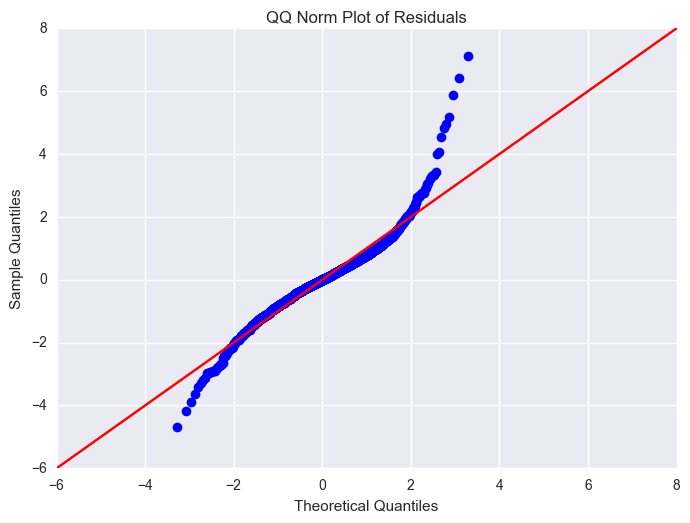

In [406]:
fig = sm.qqplot(lm6.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')